Importar bibliotecas necessárias:

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Carregar o conjunto de dados:


In [26]:
data = pd.read_csv('/content/Iris.csv')

# Exibir informações sobre o conjunto de dados
print(data.head())  # Visualizar as primeiras linhas do conjunto de dados
print(data.shape)   # Dimensões do conjunto de dados
print(data.describe())  # Estatísticas descritivas


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.3000

In [27]:
iris = load_iris()
X = iris.data
y = iris.target


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


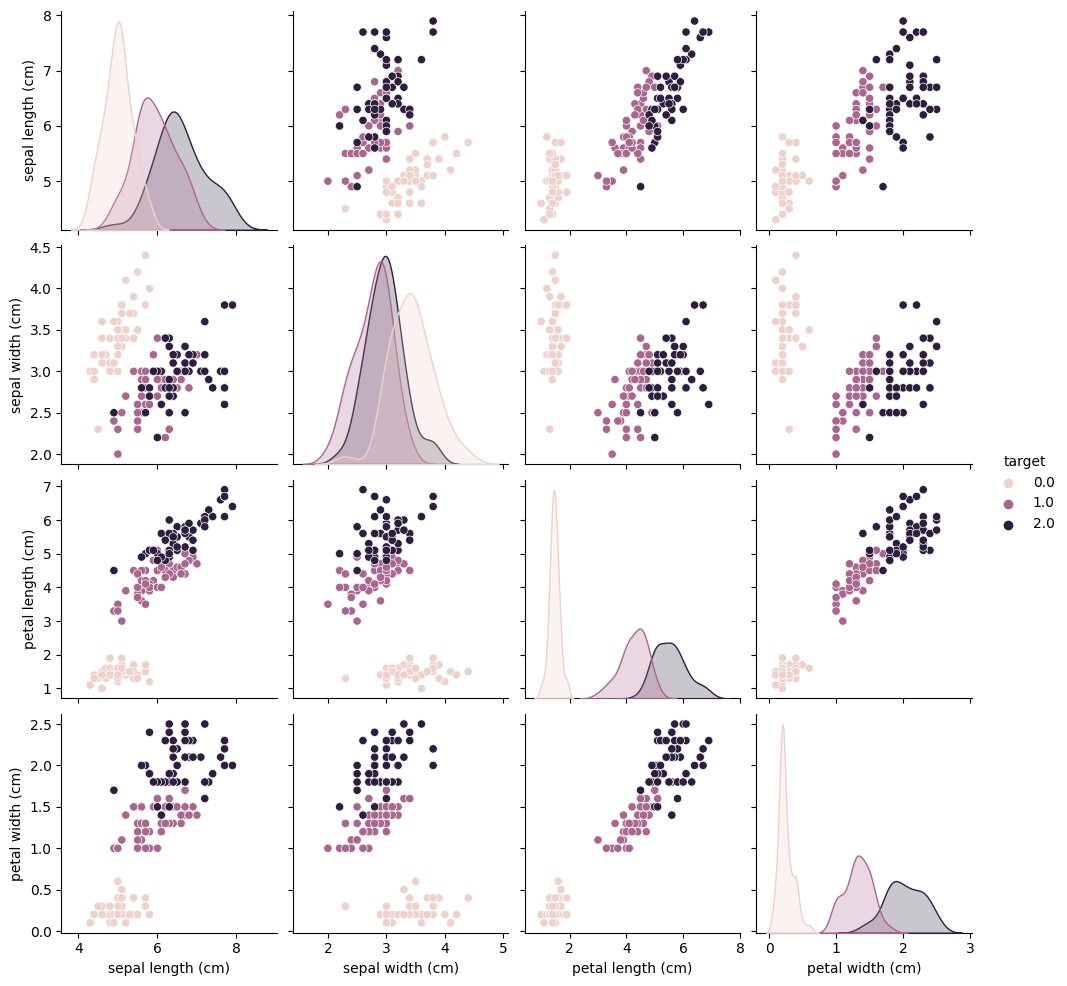

In [30]:
import seaborn as sns

# Carregar o conjunto de dados Iris como DataFrame do Pandas
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Gráfico de dispersão para visualizar pares de características
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()


Dividir o conjunto de dados em treinamento e teste:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Implementar o modelo k-NN:

In [32]:
k = 5  # Número de vizinhos
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

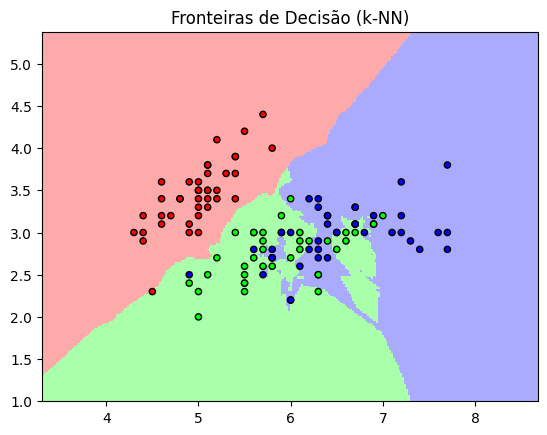

In [33]:
from matplotlib.colors import ListedColormap

# Função para plotar as fronteiras de decisão
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Use apenas as duas primeiras características para visualizar as fronteiras de decisão
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

knn_model_2d = KNeighborsClassifier(n_neighbors=k)
knn_model_2d.fit(X_train_2d, y_train)

plot_decision_boundary(X_train_2d, y_train, knn_model_2d, "Fronteiras de Decisão (k-NN)")
plt.show()


Realizar k-fold cross-validation:

In [34]:
k_folds = 5  # Número de folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = []

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    knn_fold_model = KNeighborsClassifier(n_neighbors=k)
    knn_fold_model.fit(X_fold_train, y_fold_train)

    y_pred_fold = knn_fold_model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_fold)
    accuracies.append(accuracy)


Acurácia média: 0.95
Acurácia com métrica euclidean: 1.0
Precisão com métrica euclidean: 1.0
Recall com métrica euclidean: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Acurácia com métrica manhattan: 1.0
Precisão com métrica manhattan: 1.0
Recall com métrica manhattan: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




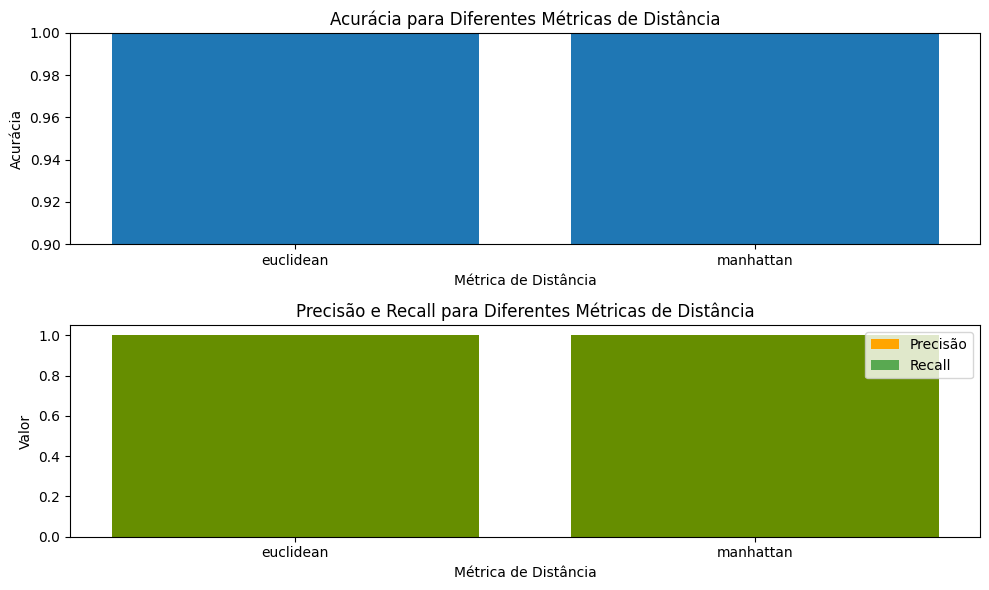

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar o modelo k-NN
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Realizar k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    knn_fold_model = KNeighborsClassifier(n_neighbors=k)
    knn_fold_model.fit(X_fold_train, y_fold_train)

    y_pred_fold = knn_fold_model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_fold)
    accuracies.append(accuracy)

    precision = precision_score(y_fold_val, y_pred_fold, average='macro')
    precisions.append(precision)

    recall = recall_score(y_fold_val, y_pred_fold, average='macro')
    recalls.append(recall)

# Calcular a acurácia média usando k-fold cross-validation
average_accuracy = np.mean(accuracies)
print("Acurácia média:", average_accuracy)

# Experimentar diferentes métricas de distância
distance_metrics = ['euclidean', 'manhattan']
accuracies_distance = []
precisions_distance = []
recalls_distance = []

for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_distance.append(accuracy)

    precision = precision_score(y_test, y_pred, average='macro')
    precisions_distance.append(precision)

    recall = recall_score(y_test, y_pred, average='macro')
    recalls_distance.append(recall)

    print(f"Acurácia com métrica {metric}: {accuracy}")
    print(f"Precisão com métrica {metric}: {precision}")
    print(f"Recall com métrica {metric}: {recall}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Gerar gráfico de acurácias para diferentes métricas de distância
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(distance_metrics, accuracies_distance)
plt.xlabel("Métrica de Distância")
plt.ylabel("Acurácia")
plt.title("Acurácia para Diferentes Métricas de Distância")
plt.ylim(0.9, 1.0)

plt.subplot(2, 1, 2)
plt.bar(distance_metrics, precisions_distance, color='orange', label='Precisão')
plt.bar(distance_metrics, recalls_distance, color='green', label='Recall', alpha=0.6)
plt.xlabel("Métrica de Distância")
plt.ylabel("Valor")
plt.title("Precisão e Recall para Diferentes Métricas de Distância")
plt.legend()

plt.tight_layout()
plt.show()


Calcular a acurácia média do modelo usando k-fold cross-validation:

In [36]:
average_accuracy = np.mean(accuracies)
print("Acurácia média:", average_accuracy)


Acurácia média: 0.95


Experimentar diferentes valores de k:

In [37]:
k_values = [3, 7, 10]
accuracies_k = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_k.append(accuracy)

print("Acurácias para diferentes valores de k:", accuracies_k)


Acurácias para diferentes valores de k: [1.0, 0.9666666666666667, 1.0]


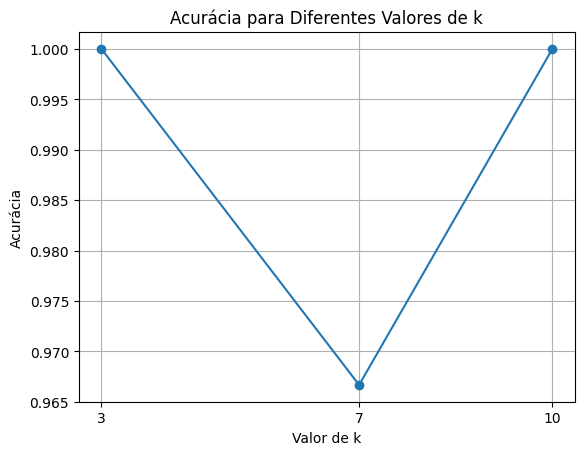

In [38]:
plt.plot(k_values, accuracies_k, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.title("Acurácia para Diferentes Valores de k")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Visualizar a distribuição das acurácias usando um boxplot:

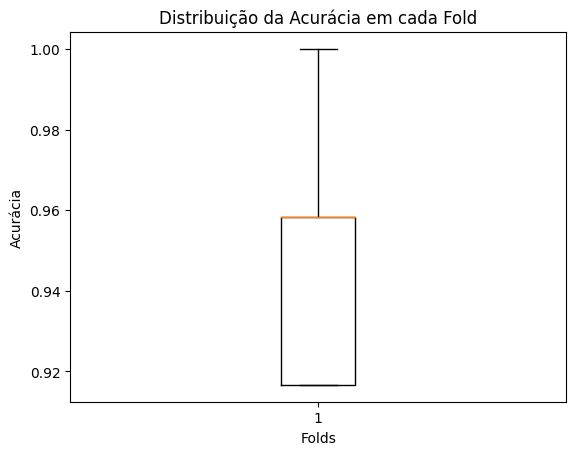

In [39]:
plt.boxplot(accuracies)
plt.xlabel("Folds")
plt.ylabel("Acurácia")
plt.title("Distribuição da Acurácia em cada Fold")
plt.show()


Experimentar diferentes métricas de distância:

In [40]:
distance_metrics = ['euclidean', 'manhattan']

for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia com métrica {metric}: {accuracy}")


Acurácia com métrica euclidean: 1.0
Acurácia com métrica manhattan: 0.9666666666666667


Acurácia média: 0.95
Acurácia com métrica euclidean: 1.0
Acurácia com métrica manhattan: 1.0


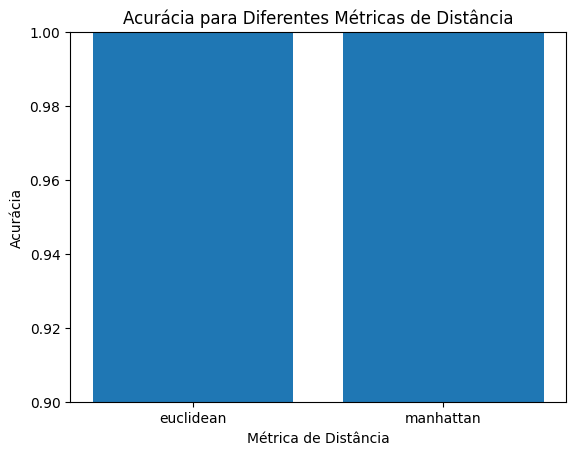

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar o modelo k-NN
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Realizar k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = []

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    knn_fold_model = KNeighborsClassifier(n_neighbors=k)
    knn_fold_model.fit(X_fold_train, y_fold_train)

    y_pred_fold = knn_fold_model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_fold)
    accuracies.append(accuracy)

# Calcular a acurácia média usando k-fold cross-validation
average_accuracy = np.mean(accuracies)
print("Acurácia média:", average_accuracy)

# Experimentar diferentes métricas de distância
distance_metrics = ['euclidean', 'manhattan']
accuracies_distance = []

for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_distance.append(accuracy)
    print(f"Acurácia com métrica {metric}: {accuracy}")

# Gerar gráfico de acurácias para diferentes métricas de distância
plt.bar(distance_metrics, accuracies_distance)
plt.xlabel("Métrica de Distância")
plt.ylabel("Acurácia")
plt.title("Acurácia para Diferentes Métricas de Distância")
plt.ylim(0.9, 1.0)
plt.show()


Acurácia com métrica euclidean: 1.0
Acurácia com métrica manhattan: 1.0


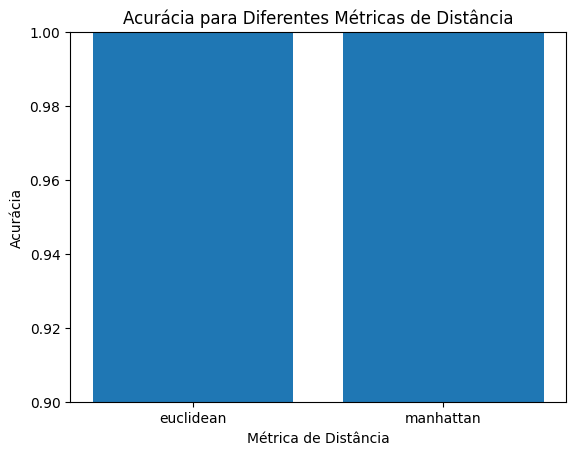

In [42]:
# Experimentar diferentes métricas de distância
distance_metrics = ['euclidean', 'manhattan']
accuracies_distance = []

for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_distance.append(accuracy)
    print(f"Acurácia com métrica {metric}: {accuracy}")

# Gerar gráfico de acurácias para diferentes métricas de distância
plt.bar(distance_metrics, accuracies_distance)
plt.xlabel("Métrica de Distância")
plt.ylabel("Acurácia")
plt.title("Acurácia para Diferentes Métricas de Distância")
plt.ylim(0.9, 1.0)
plt.show()

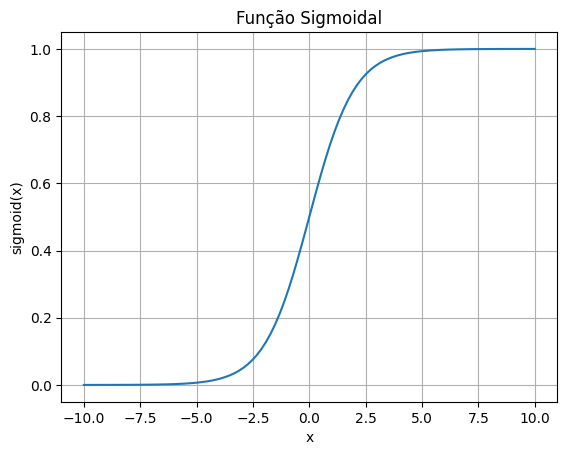

In [43]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Criar um array de valores para x
x = np.linspace(-10, 10, 100)

# Calcular os valores da função sigmoidal para cada valor de x
y = sigmoid(x)

# Plotar o gráfico da função sigmoidal
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Função Sigmoidal")
plt.grid(True)
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Criar dados de exemplo
np.random.seed(42)
X_train = np.random.rand(100, 2)
y_train = np.random.randint(0, 2, 100)

# Inicializar o modelo de regressão logística
logreg_model = LogisticRegression()

# Treinar o modelo nos dados de treinamento
logreg_model.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento
y_pred = logreg_model.predict(X_train)

# Calcular a função de custo (log loss)
logloss = log_loss(y_train, y_pred)

print("Log Loss:", logloss)


Log Loss: 15.138334423429205


Iteração 10, Log Loss: 15.138334423429205
Iteração 20, Log Loss: 15.138334423429205
Iteração 30, Log Loss: 15.138334423429205
Iteração 40, Log Loss: 15.138334423429205
Iteração 50, Log Loss: 15.138334423429205
Iteração 60, Log Loss: 15.138334423429205
Iteração 70, Log Loss: 15.138334423429205
Iteração 80, Log Loss: 15.138334423429205
Iteração 90, Log Loss: 15.138334423429205


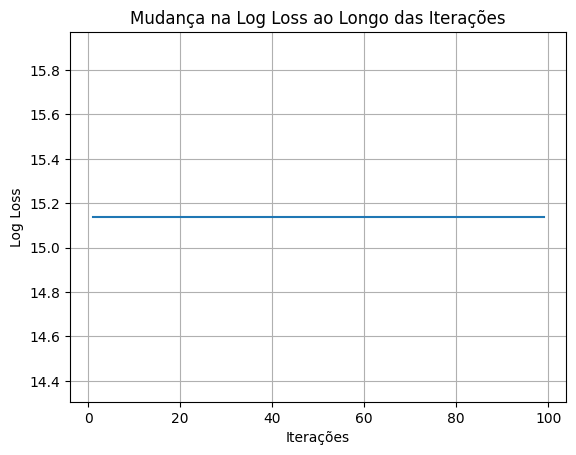

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Criar dados de exemplo
np.random.seed(42)
X_train = np.random.rand(100, 2)
y_train = np.random.randint(0, 2, 100)

# Inicializar o modelo de regressão logística
logreg_model = LogisticRegression()

# Listas para armazenar os valores de log loss e iterações
logloss_values = []
iterations = []

# Treinar o modelo em um loop e acompanhar as mudanças na função de custo
for i in range(1, 100):
    logreg_model.fit(X_train, y_train)
    y_pred = logreg_model.predict(X_train)
    logloss = log_loss(y_train, y_pred)

    logloss_values.append(logloss)
    iterations.append(i)

    if i % 10 == 0:
        print(f"Iteração {i}, Log Loss: {logloss}")

# Plotar o gráfico da função de custo ao longo das iterações
plt.plot(iterations, logloss_values)
plt.xlabel("Iterações")
plt.ylabel("Log Loss")
plt.title("Mudança na Log Loss ao Longo das Iterações")
plt.grid(True)
plt.show()


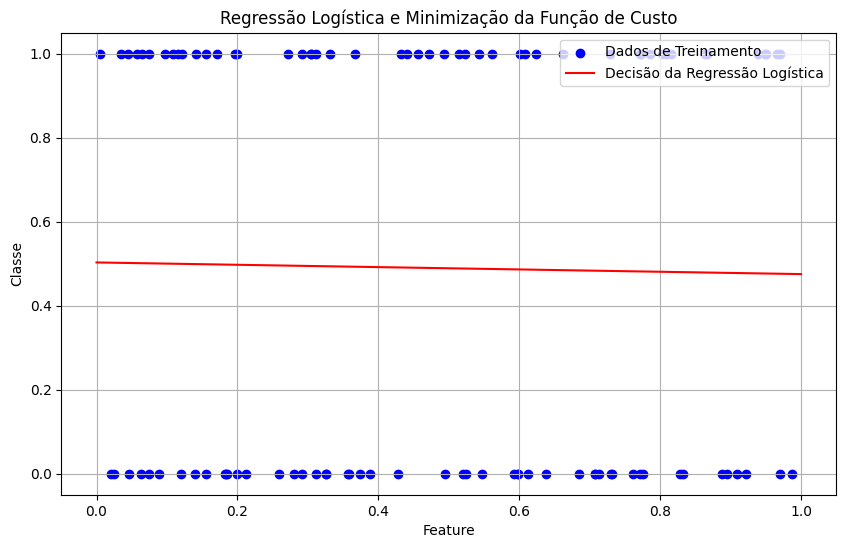

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Criar dados de exemplo
np.random.seed(42)
X_train = np.random.rand(100, 1)
y_train = np.random.randint(0, 2, 100)

# Inicializar o modelo de regressão logística
logreg_model = LogisticRegression()

# Treinar o modelo nos dados de treinamento
logreg_model.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento
y_pred = logreg_model.predict(X_train)

# Calcular a função de custo (log loss)
logloss = log_loss(y_train, y_pred)

# Gerar gráfico
plt.figure(figsize=(10, 6))

# Scatter plot dos pontos de dados
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')

# Linha de decisão da regressão logística
x_range = np.linspace(0, 1, 100)
decision_boundary = logreg_model.predict_proba(x_range.reshape(-1, 1))[:, 1]
plt.plot(x_range, decision_boundary, color='red', label='Decisão da Regressão Logística')

plt.xlabel("Feature")
plt.ylabel("Classe")
plt.title("Regressão Logística e Minimização da Função de Custo")
plt.legend()
plt.grid(True)
plt.show()
